# What factors impact the housing rent in Shanghai, China?

Student Number:20090616

PART1: DATA PREPARATION

1.1 Set up the environmrnt and packages. Import the data.csv.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import copy

pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.2f}'.format
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import os
path = os.getcwd()
df = pd.read_csv(path + '/HouserentV2.csv',low_memory=False)
df.head()

,Rent,Unit_price,Size,District,Room_number,Decoration,Resource,Income,Distance
0,5000,151.52,33.00,Pudong,2,Hardcover,Lianjia,74627,5.66
1,4600,88.46,52.00,Pudong,2,Simplified,Lianjia,74627,9.83
2,5000,131.58,38.00,Pudong,2,Simplified,Zhongyuan,74627,7.10
3,5500,91.67,60.00,Pudong,2,Simplified,Lianjia,74627,17.15
4,5500,144.74,38.00,Pudong,2,Hardcover,Lianjia,74627,50.72


In [3]:
df.dtypes

  Rent           int64
Unit_price     float64
Size           float64
District        object
Room_number      int64
Decoration      object
Resource        object
Income           int64
Distance       float64
dtype: object

In [4]:
df.describe()

,Rent,Unit_price,Size,Room_number,Income,Distance
count,"35,295.00","35,295.00","35,295.00","35,295.00","35,295.00","34,663.00"
mean,"8,306.04",107.52,81.92,3.32,"76,558.20",12.40
std,"5,208.39",43.09,44.81,1.31,"7,992.36",11.11
min,500.00,5.52,6.42,0.00,"41,990.00",0.02
25%,"5,000.00",78.33,50.00,2.00,"74,627.00",5.96
50%,"6,500.00",102.63,73.00,3.00,"74,736.00",9.37
75%,"9,500.00",132.80,101.00,4.00,"82,624.00",15.16
max,"30,000.00",545.45,590.00,12.00,"88,001.00",164.29


1.2 Remove the 'NA' data..The count of data was deleted from 35,295 to 34,663. 

In [5]:
df = df.dropna(how='any')
df.describe()

,Rent,Unit_price,Size,Room_number,Income,Distance
count,"34,663.00","34,663.00","34,663.00","34,663.00","34,663.00","34,663.00"
mean,"8,333.34",107.14,82.36,3.33,"76,495.26",12.40
std,"5,233.16",42.96,44.90,1.31,"7,982.70",11.11
min,500.00,5.52,6.60,0.00,"41,990.00",0.02
25%,"5,000.00",78.02,50.73,2.00,"74,627.00",5.96
50%,"6,500.00",102.26,73.87,3.00,"74,736.00",9.37
75%,"9,500.00",132.35,102.00,4.00,"82,624.00",15.16
max,"30,000.00",545.45,590.00,12.00,"88,001.00",164.29


1.3 Check outliners according to the unit rent and size.The count of data was deleted from 34,663 to 34,035. Generally, over the 1% of the original data should be reserved.However, the 628 is similar to 346 comparing with the huge base data 34,663. Thus the outliers are suggested to be cleared.

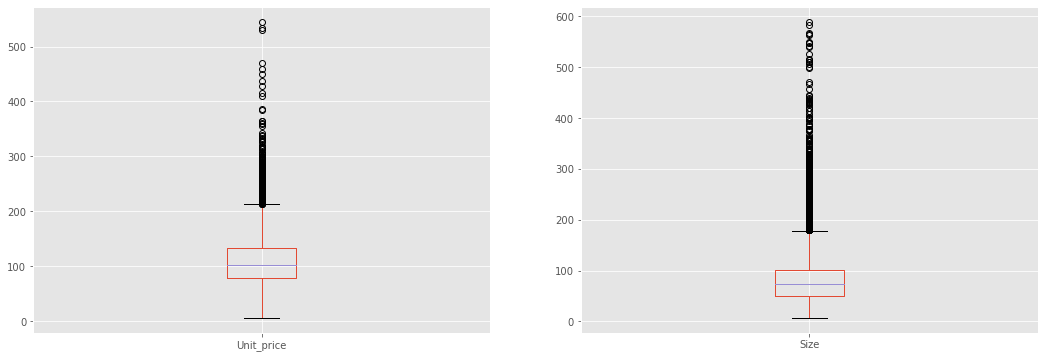

In [6]:
fig,ax = plt.subplots(1,2,figsize = (18,6))
df['Unit_price'].plot.box(ax = ax[0])
df['Size'].plot.box(ax = ax[1])
plt.show()

In [7]:
def get_norm(data, col):
    q1 = data[col].quantile(q = 0.25)
    q3 = data[col].quantile(q = 0.75)
    iqr = q3 - q1
    t1 = q1 - 1.5*iqr
    t2 = q3 + 1.5*iqr
    return data[(data[col]>t1) & (data[col]<t2)]

df_original = df
df = get_norm(df, 'Unit_price')
df.describe()

,Rent,Unit_price,Size,Room_number,Income,Distance
count,"34,096.00","34,096.00","34,096.00","34,096.00","34,096.00","34,096.00"
mean,"8,240.99",104.81,82.76,3.35,"76,377.22",12.51
std,"5,124.31",38.92,44.94,1.31,"7,981.25",10.99
min,500.00,5.52,10.00,0.00,"41,990.00",0.02
25%,"5,000.00",77.55,51.00,2.00,"74,627.00",6.06
50%,"6,500.00",101.48,74.00,3.00,"74,736.00",9.51
75%,"9,500.00",130.61,102.00,4.00,"82,624.00",15.36
max,"30,000.00",213.85,590.00,12.00,"88,001.00",164.29


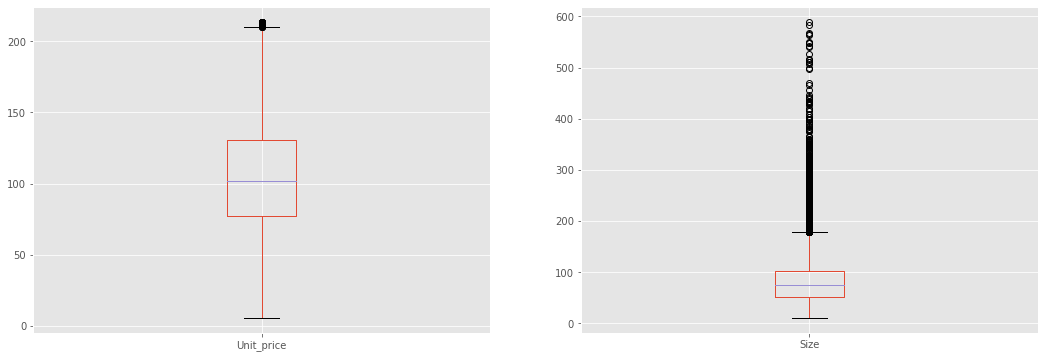

In [8]:
fig,ax = plt.subplots(1,2,figsize = (18,6))
df['Unit_price'].plot.box(ax = ax[0])
df['Size'].plot.box(ax = ax[1])
plt.show()

PART2: NECESSARY TEST DURING BIVARIATES

2.1 Delete the data with the Room Number is 0. And set the base font and color. Making the bivariate plot, using broken line diagram, scatter diagram, bar diagram to visualise these relations.

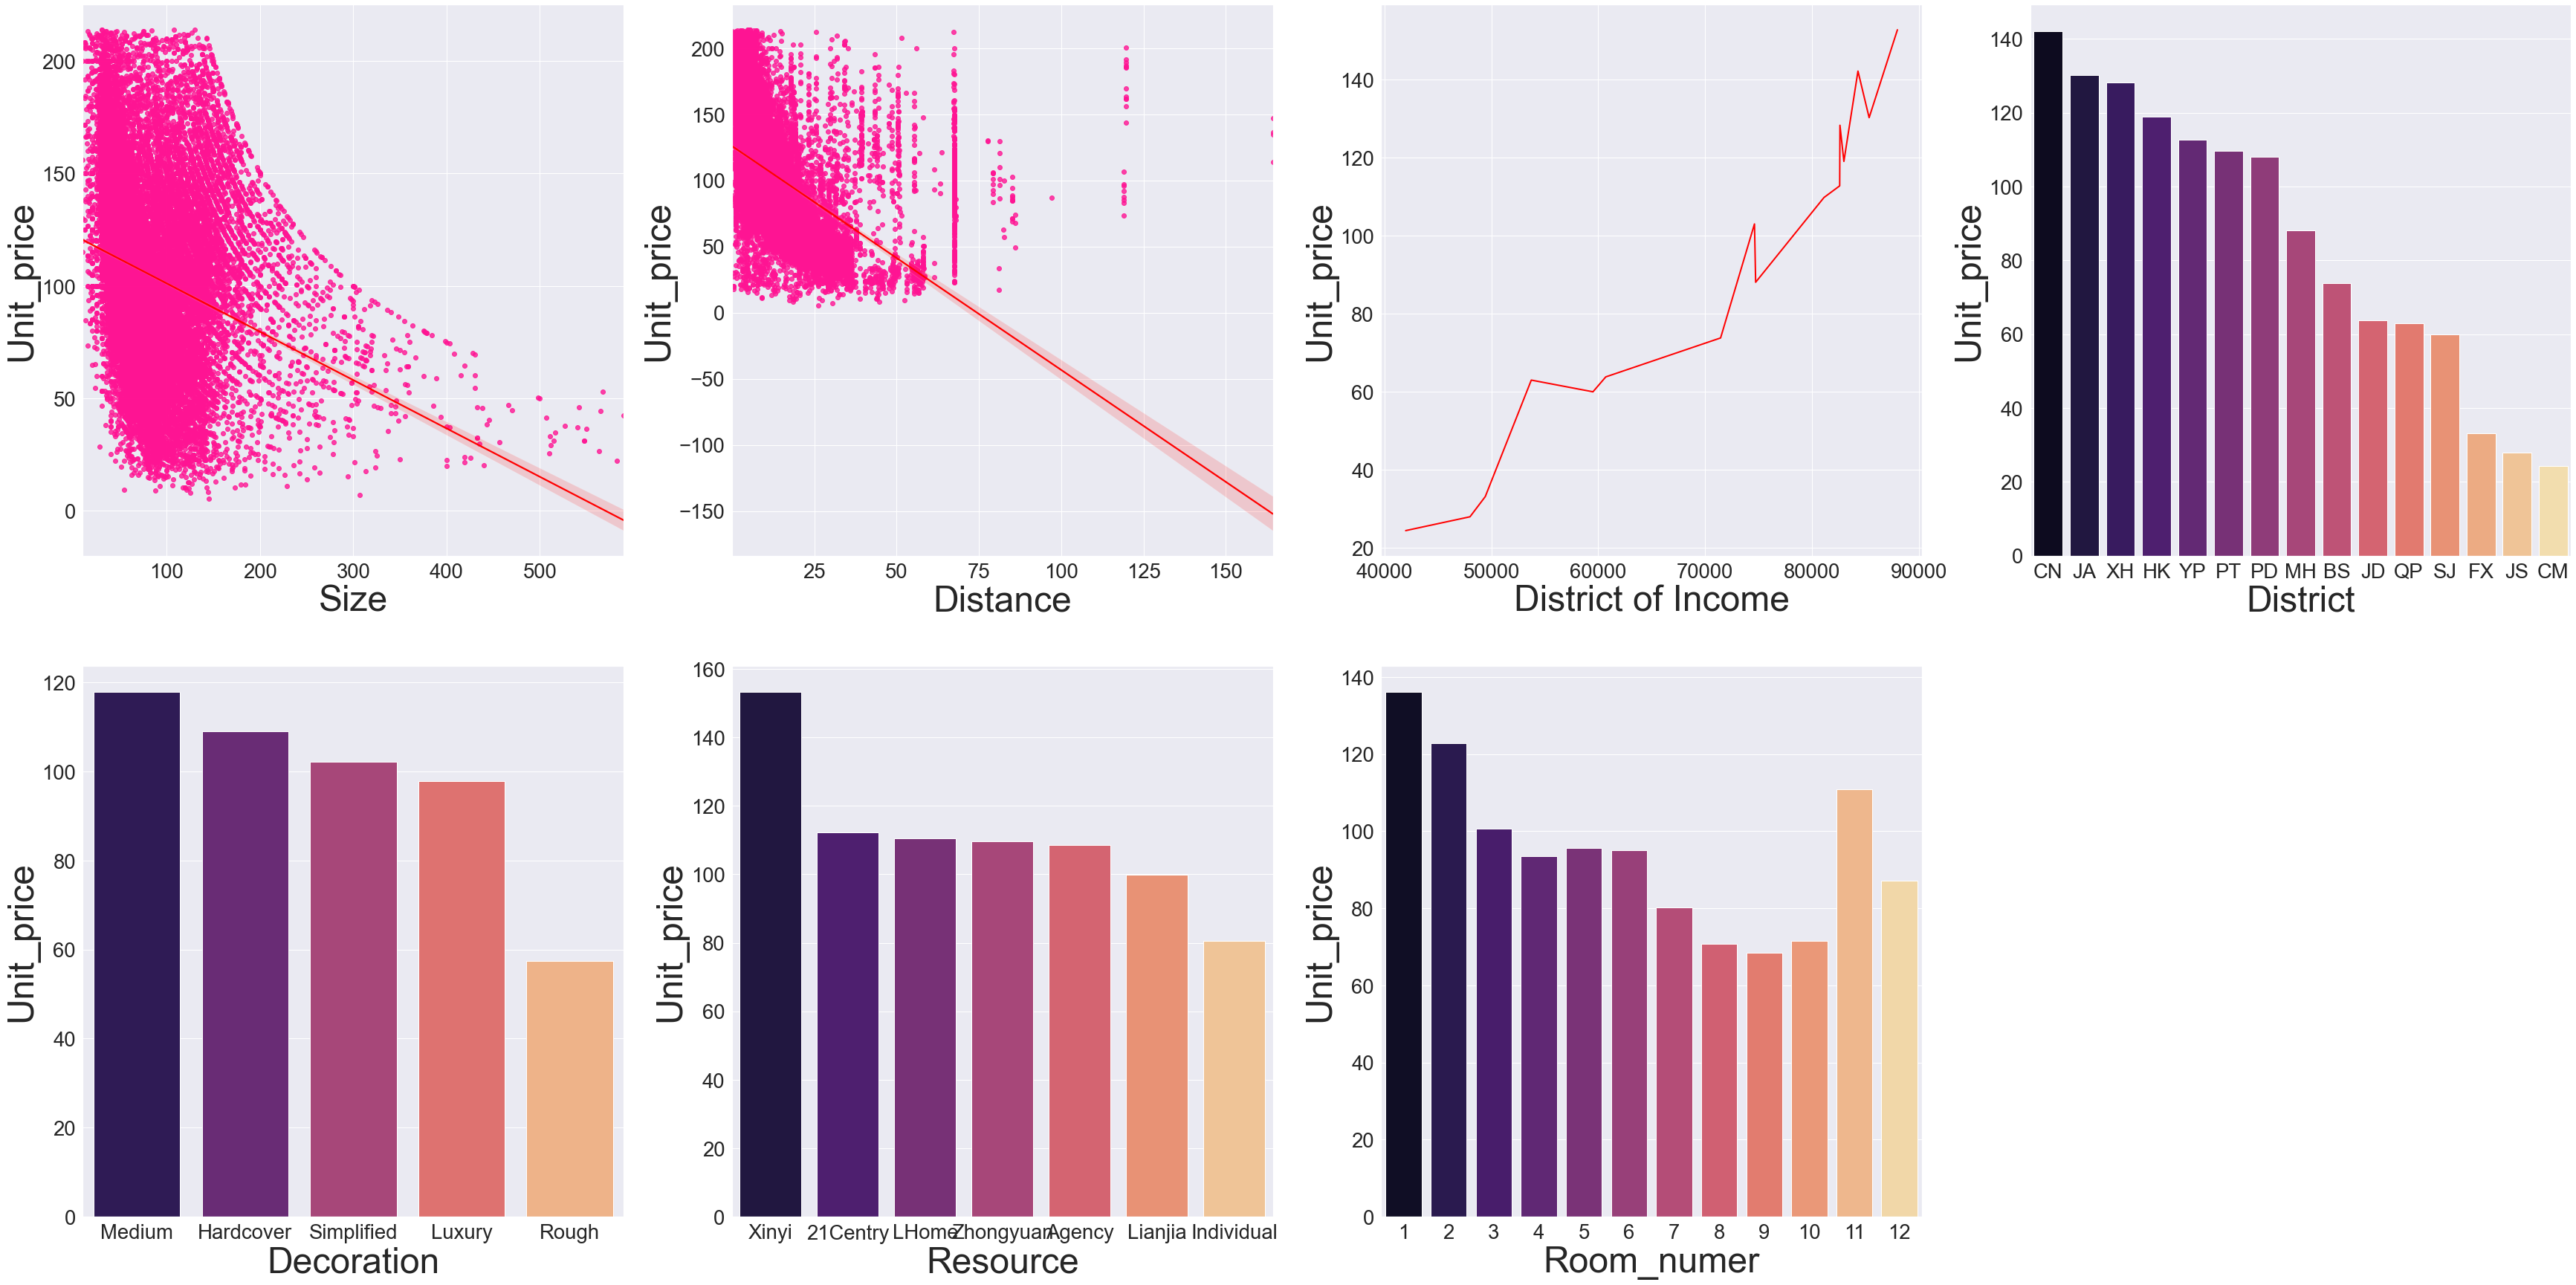

In [9]:
# Delete the data with the Room Number is 0.
df = df[df.Room_number != 0]
# Setting the base font and color.
font_size = 30
color_base = "magma"
sns.set(font_scale = 2.5)

# Fig 1. bivariate plots between dependent and independent variables
f2,axes = plt.subplots(2, 4, figsize=(60,30))

# size
sns.regplot(x='Size', y='Unit_price', data=df, ax=axes[0,0], scatter_kws={"color": "deeppink"}, line_kws={"color": "red"})
axes[0,0].set_xlabel('Size', fontsize=font_size*1.6)
axes[0,0].set_ylabel('Unit_price', fontsize=font_size*1.6)
# distance
sns.regplot(x='Distance', y='Unit_price', data=df, ax=axes[0,1], scatter_kws={"color": "deeppink"}, line_kws={"color": "red"})
axes[0,1].set_xlabel('Distance', fontsize=font_size*1.6)
axes[0,1].set_ylabel('Unit_price', fontsize=font_size*1.6)
#income
df.groupby(df['Income'])['Unit_price'].mean().plot(color='red',linewidth=2.0,linestyle='-',ax=axes[0,2])
axes[0,2].set_xlabel('District of Income', fontsize=font_size*1.6)
axes[0,2].set_ylabel('Unit_price', fontsize=font_size*1.6)
# district
district_abbreviation = {'Huangpu': 'PD', 'Jingan': 'JA', 'Changning': 'CN', 'Hongkou': 'HK', 'Xuhui': 'XH', 'Yangpu': 'YP', 'Putuo': 'PT', 'Minhang': 'MH', 'Pudong': 'PD', 'Baoshan': 'BS', 'Jiading': 'JD', 'Songjiang': 'SJ', 'Qingpu': 'QP', 'Fengxian': 'FX', 'Jinshan': 'JS', 'Chongming':'CM'}
dfa = copy.deepcopy(df)
dfa['District'] = dfa['District'].apply(lambda x : district_abbreviation[x])
df_house_mean = dfa.groupby('District')['Unit_price'].mean().sort_values(ascending=False).to_frame().reset_index()
sns.barplot(x='District', y='Unit_price', palette=color_base, data=df_house_mean, ax=axes[0,3])
axes[0,3].set_xlabel('District', fontsize=font_size*1.6)
axes[0,3].set_ylabel('Unit_price', fontsize=font_size*1.6)
# room
df_RoomMean_Price = df.groupby('Room_number')['Unit_price'].mean().sort_values(ascending=False).to_frame().reset_index()
sns.barplot(x='Room_number', y='Unit_price', palette=color_base, data=df_RoomMean_Price, ax=axes[1,2])
axes[1,2].set_xlabel('Room_numer', fontsize=font_size*1.6)
axes[1,2].set_ylabel('Unit_price', fontsize=font_size*1.6)
# decoration
df_ReMean_Price = df.groupby('Decoration')['Unit_price'].mean().sort_values(ascending=False).to_frame().reset_index()
sns.barplot(x='Decoration', y='Unit_price', palette=color_base, data=df_ReMean_Price, ax=axes[1,0])
axes[1,0].set_xlabel('Decoration', fontsize=font_size*1.6)
axes[1,0].set_ylabel('Unit_price', fontsize=font_size*1.6)
# resource
df_TaMean_Price = df.groupby('Resource')['Unit_price'].mean().sort_values(ascending=False).to_frame().reset_index()
sns.barplot(x='Resource', y='Unit_price', palette=color_base, data=df_TaMean_Price, ax=axes[1,1])
axes[1,1].set_xlabel('Resource', fontsize=font_size*1.6)
axes[1,1].set_ylabel('Unit_price', fontsize=font_size*1.6)

f2.delaxes(ax= axes[1,3])

plt.savefig('./Fig.1.Bivariate plots between dependent and independent variables.jpg')
plt.show()

2.2 From the diagrams above, drop the factor-resources, and according to the category factor-decoration, define the degreee of the decoration. Given the rank from 1-5 to encode the rough, simplified, medium,hardcover,and luxury. After that, making the heatmap for each independent variables.

In [10]:
# Decoration encoding
renovation_encode = {'Luxury': 5, 'Hardcover': 4, 'Medium': 3, 'Simplified': 2, 'Rough': 1}
df['Decoration_degree'] = df['Decoration'].apply(lambda x : renovation_encode[x])
del df['Decoration']

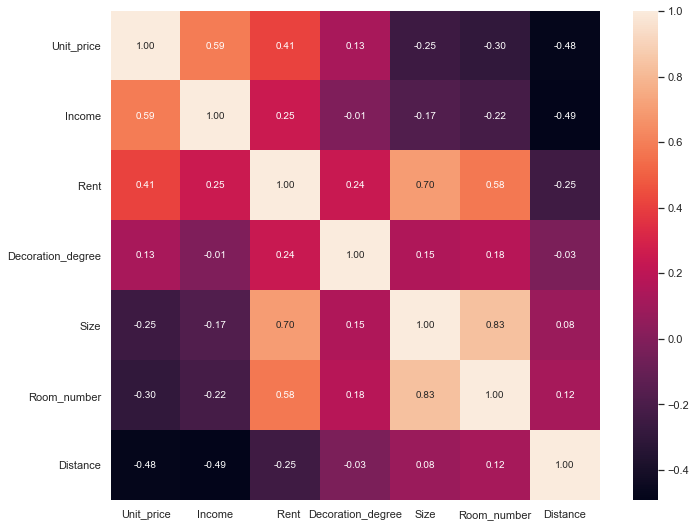

In [11]:
# Fig 2.Heatmap of each independent variables
corr = df.corr()
k=15
cols = corr.nlargest(k, 'Unit_price')['Unit_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('./Fig.2.Heatmap of each independent variables.jpg')
plt.show()

2.3 Make the VIF to test the degree of multipulities.The VIFs for all the independent variables are under 5,there's a low multipulities.

In [12]:
y, X = dmatrices('Unit_price~ Size+ Room_number+ Income+ Decoration_degree+ Distance', data = df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,166.17,Intercept
1,3.28,Size
2,3.39,Room_number
3,1.37,Income
4,1.04,Decoration_degree
5,1.32,Distance


PART 3: MULTI REGRESSION MODEL

3.1 Firstly, make a simple multi regression model to test the values of R-squared, Skew, and Kurtosis. From the model1, the Skew(0.565) and Kurtosis (3.667) show it's similar to the normaliazation distribution.The R-squared value is lower than 0.5, which should be improved later.

In [13]:
multi_regression_model_1 = smf.ols(formula='Unit_price ~ Size+ Room_number+ Income+ Decoration_degree+ Distance',data=df).fit()

print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Unit_price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     5466.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:52:55   Log-Likelihood:            -1.6298e+05
No. Observations:               34054   AIC:                         3.260e+05
Df Residuals:                   34048   BIC:                         3.260e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -41.2006      2.02

3.2 From the first model, adjust the dependent variable like logtransformation to test the multi regression models. Because the decoration degree and income of each district are categoried by several levels, the log transformation seems meanless for these two factors. Thus Decoration_degree and Income are excluded.

C:\Users\79263\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\79263\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\79263\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

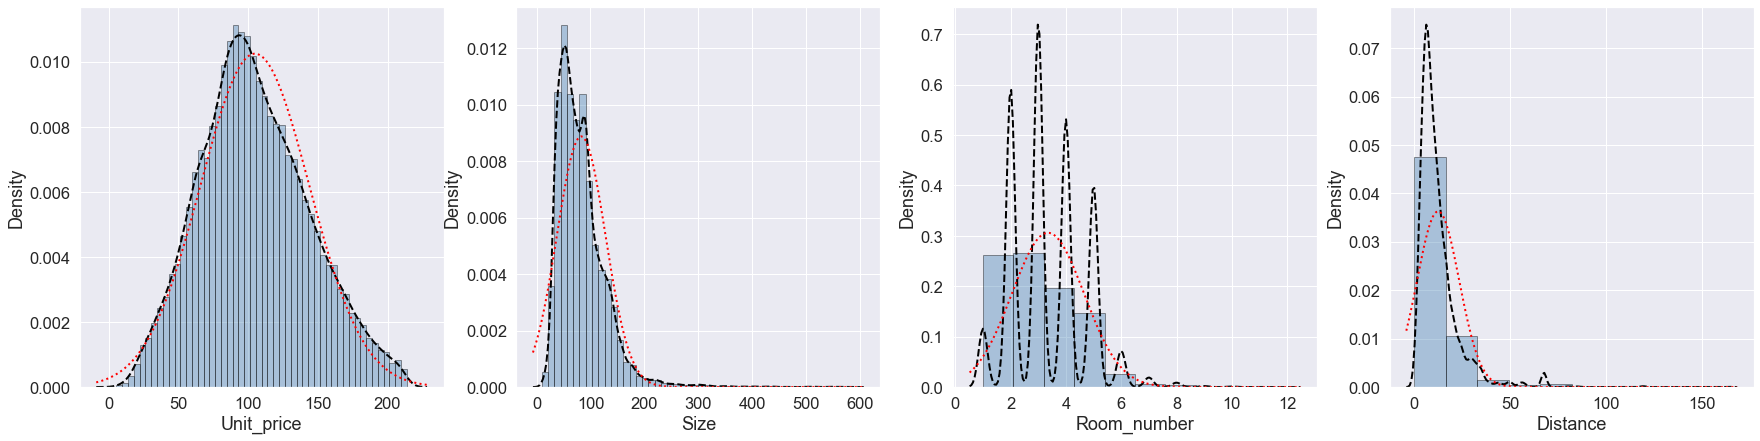

In [14]:
# Fig 3. Distribution histograms for independent variables.
sns.set(font_scale = 1.5)
f4, [ax1, ax2, ax3, ax4] = plt.subplots(1,4, figsize=(30, 7))
# Unit rent price
sns.distplot(a=df.Unit_price, fit=stats.norm, norm_hist=True, ax=ax1, 
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'linewidth':2},
             fit_kws={'color':'red', 'linestyle':':', 'linewidth':2})
# Size
sns.distplot(a=df.Size, fit=stats.norm, norm_hist=True, ax=ax2, 
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'linewidth':2},
             fit_kws={'color':'red', 'linestyle':':', 'linewidth':2})
# Room_number
sns.distplot(a=df.Room_number, bins=10, fit=stats.norm, norm_hist=True, ax=ax3, 
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'linewidth':2},
             fit_kws={'color':'red', 'linestyle':':', 'linewidth':2})
# Distance
sns.distplot(a=df.Distance, bins=10, fit=stats.norm, norm_hist=True, ax=ax4, 
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'linewidth':2},
             fit_kws={'color':'red', 'linestyle':':', 'linewidth':2})
plt.savefig('./Fig.3.Distribution histograms for independent variables.jpg')
plt.show()

C:\Users\79263\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\79263\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\79263\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

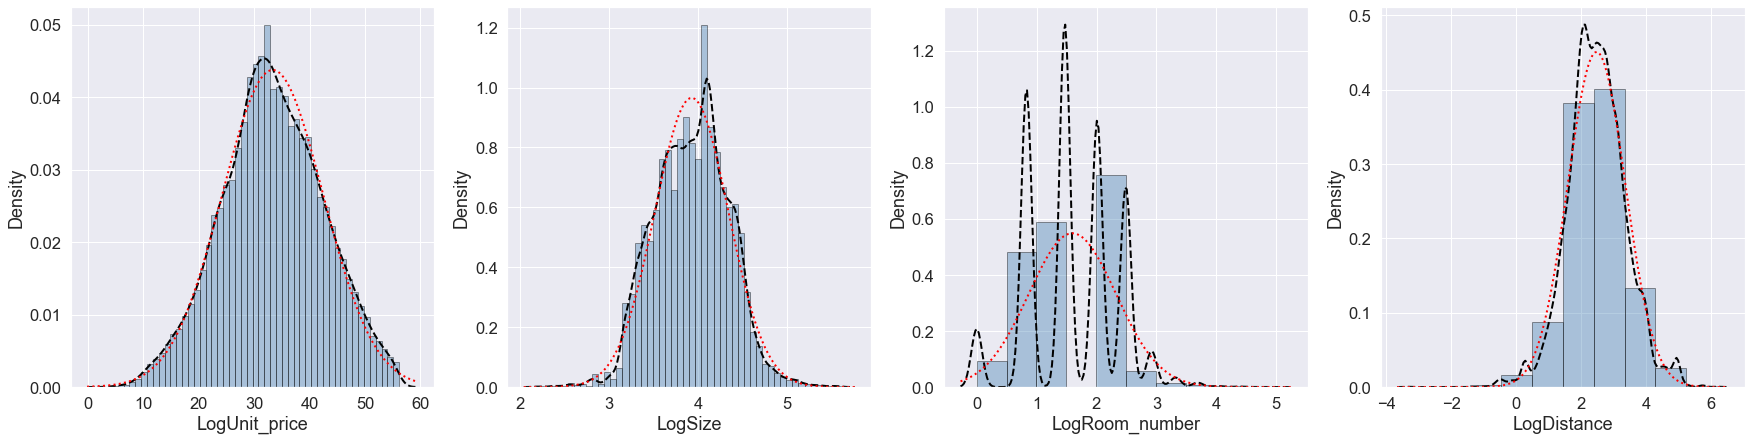

In [15]:
# Perform log transformation for Unit rent price, Size，Room number, Income and Decoration degree.
df['LogUnit_price'],lambda_=stats.boxcox(df.Unit_price)
df['LogSize'],lambda_=stats.boxcox(df.Size)
df['LogRoom_number'],lambda_=stats.boxcox(df.Room_number)
df['LogDistance'],lambda_=stats.boxcox(df.Distance)

# Fig 4. Distribution histograms for  Unit rent price, Size，Room number,and Distance after log transformation.
f4, [ax1, ax2, ax3, ax4] = plt.subplots(1,4, figsize=(30, 7))
# Unit rent price
sns.distplot(a=df.LogUnit_price, fit=stats.norm, norm_hist=True, ax=ax1, 
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'linewidth':2},
             fit_kws={'color':'red', 'linestyle':':', 'linewidth':2})
# Size
sns.distplot(a=df.LogSize, fit=stats.norm, norm_hist=True, ax=ax2, 
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'linewidth':2},
             fit_kws={'color':'red', 'linestyle':':', 'linewidth':2})
# Room_number
sns.distplot(a=df.LogRoom_number, bins=10, fit=stats.norm, norm_hist=True, ax=ax3, 
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'linewidth':2},
             fit_kws={'color':'red', 'linestyle':':', 'linewidth':2})
# Distance
sns.distplot(a=df.LogDistance, bins=10, fit=stats.norm, norm_hist=True, ax=ax4, 
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'linewidth':2},
             fit_kws={'color':'red', 'linestyle':':', 'linewidth':2})

plt.savefig('./Fig 4.Distribution histograms for  Unit rent price, Size，Room number,and Distance after log transformation..jpg')
plt.show()

sns.set(font_scale = 1)

3.3 Make the Multi regression model after log transformation. And test the R-squared value by deleting each factor.

In [30]:
multi_regression_model_2 = smf.ols(formula='LogUnit_price ~ LogSize+ Income+ Decoration_degree+ LogDistance',data=df).fit()

print(multi_regression_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          LogUnit_price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 1.069e+04
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:16:12   Log-Likelihood:            -1.0975e+05
No. Observations:               34054   AIC:                         2.195e+05
Df Residuals:                   34049   BIC:                         2.196e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            34.4719      0.60

3.4 Meke the Residual Scatter diagram. It shows almost the vertical bars are centered near zero and spread symmetrically in each direction, indicating constant variance and near zero mean for residuals. The residual of the model has no linear relationship, so it passes the independence test.Besides, the residual distribution is shown normalizational.

C:\Users\79263\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


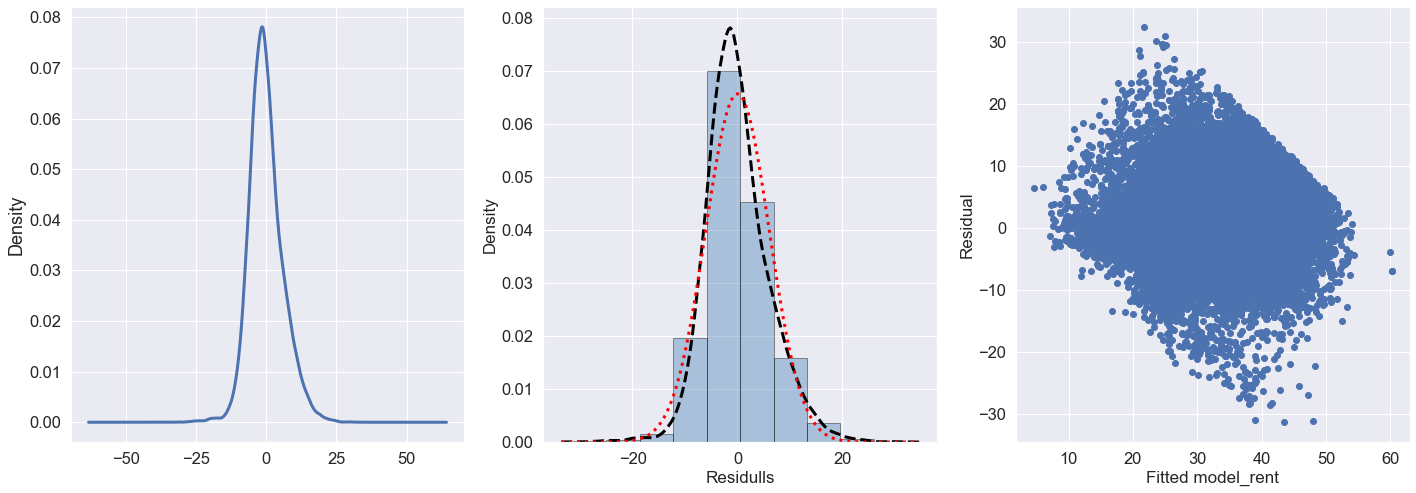

In [31]:
# Fig 5. Residual investigation of model 2.
sns.set(font_scale = 1.5)
f5, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(24, 8))
multi_regression_model_2.resid.plot.density(linewidth=3, ax=ax1)
ax1.set_ylabel('Density')
sns.distplot(a=multi_regression_model_2.resid, bins=10, fit=stats.norm, norm_hist=True, ax=ax2, 
             hist_kws={'color': 'steelblue', 'edgecolor': 'black'},
             kde_kws={'color': 'black', 'linestyle': '--', 'linewidth': 3},
             fit_kws={'color': 'red', 'linestyle': ':', 'linewidth': 3})
ax2.set_ylabel('Density', fontsize=17)
ax2.set_xlabel('Residulls', fontsize=17)
ax3.scatter(multi_regression_model_2.fittedvalues, multi_regression_model_2.resid)
ax3.set_xlabel('Fitted model_rent', fontsize=17)
ax3.set_ylabel('Residual', fontsize=17)
plt.savefig('./Fig 5.Residual Investigation of model 2.jpg')
plt.show()


PART 4: CATEGORY ANALYSIS

4.1 Make the regional and the rent type resource regression model.

In [38]:
# regional regression
Rentdistrict = pd.DataFrame(columns=('Unit_price','District'))
Rentdistrict['Unit_price'] = df['Unit_price']
Rentdistrict['District'] = df['District']

In [39]:
rent_numeric = pd.get_dummies(Rentdistrict)
rent_numeric.info()

Rentdistrict_rank=Rentdistrict.groupby("District")
Rentdistrict_rank["Unit_price"].agg(["mean","median","std","min","max","count"]).reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34054 entries, 0 to 35294
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unit_price          34054 non-null  float64
 1   District_Baoshan    34054 non-null  uint8  
 2   District_Changning  34054 non-null  uint8  
 3   District_Chongming  34054 non-null  uint8  
 4   District_Fengxian   34054 non-null  uint8  
 5   District_Hongkou    34054 non-null  uint8  
 6   District_Huangpu    34054 non-null  uint8  
 7   District_Jiading    34054 non-null  uint8  
 8   District_Jingan     34054 non-null  uint8  
 9   District_Jinshan    34054 non-null  uint8  
 10  District_Minhang    34054 non-null  uint8  
 11  District_Pudong     34054 non-null  uint8  
 12  District_Putuo      34054 non-null  uint8  
 13  District_Qingpu     34054 non-null  uint8  
 14  District_Songjiang  34054 non-null  uint8  
 15  District_Xuhui      34054 non-null  uint8  
 16  Dist

,District,mean,median,std,min,max,count
0,Baoshan,73.73,72.78,21.00,8.30,193.20,2040
1,Changning,142.11,141.30,29.84,29.09,213.85,2385
2,Chongming,24.35,23.21,9.50,8.00,63.64,56
3,Fengxian,33.08,32.53,11.22,5.52,129.17,320
4,Hongkou,118.98,116.57,27.78,15.29,211.50,1160
5,Huangpu,152.71,154.26,30.69,17.82,213.33,1190
6,Jiading,63.75,62.74,20.15,9.09,171.67,1124
7,Jingan,130.19,125.00,36.21,18.80,213.43,1987
8,Jinshan,27.90,27.02,8.08,14.47,61.36,86
9,Minhang,88.00,84.78,26.44,9.31,212.50,3803


In [41]:
Rent_district =rent_numeric.loc[:,['Unit_price','District_Baoshan','District_Changning','District_Chongming','District_Fengxian','District_Hongkou', 'District_Huangpu', 'District_Jiading', 'District_Jingan','District_Minhang','District_Pudong','District_Putuo','District_Qingpu','District_Songjiang','District_Xuhui','District_Yangpu']]
Rent_district.columns
# using VIF on the district model.
df_predictors_selected_VIF = drop_column_using_vif_(Rent_district.drop('Unit_price', axis=1))

print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

model_Rent_district = sm.OLS(endog=df[['Unit_price']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_Rent_district.summary()


Dropping: District_Pudong
The columns remaining after VIF selection are:
Index(['District_Baoshan', 'District_Changning', 'District_Chongming',
       'District_Fengxian', 'District_Hongkou', 'District_Huangpu',
       'District_Jiading', 'District_Jingan', 'District_Minhang',
       'District_Putuo', 'District_Qingpu', 'District_Songjiang',
       'District_Xuhui', 'District_Yangpu'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit_price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     1557.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:49:12   Log-Likelihood:            -1.6459e+05
No. Observations:               34054   AIC:                         3.292e+05
Df Residuals:                   34039   BIC:                         3.293e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                102.3463      0.294    348.183      0.000     101.770     102.922
District_Baoshan     -28.6141      0.734    -38.961      0.000     -30.054     -27.175
District_Changning    39.7666      0.688     57.769      0.000      38.417      41.116
District_Chongming   -77.9936      4.073    -19.150      0.000     -85.976     -70.011
District_Fengxian    -69.2705      1.725    -40.167      0.000     -72.651     -65.890
District_Hongkou      16.6298      0.940     17.697      0.000      14.788      18.472
District_Huangpu      50.3603      0.929     54.212      0.000      48.540      52.181
District_Jiading     -38.5970      0.953    -40.493      0.000     -40.465     -36.729
District_Jingan       27.8397      0.743     37.489      0.000      26.384      29.295
District_Minhang     -14.3424      0.574    -24.990      0.000     -15.467     -13.217
District_Putuo         7.3730      0.682     10.818      0.000       6.037       8.709
District_Qingpu      -39.4191      1.343    -29.348      0.000     -42.052     -36.787
District_Songjiang   -42.4193      0.872    -48.660      0.000     -44.128     -40.711
District_Xuhui        25.8841      0.622     41.591      0.000      24.664      27.104
District_Yangpu       10.3637      0.762     13.599      0.000       8.870      11.858
==============================================================================
Omnibus:                      647.071   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              808.018
Skew:                           0.267   Prob(JB):                    3.48e-176
Kurtosis:                       3.534   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Resource agency regression
Rentresource = pd.DataFrame(columns=('Unit_price','Resource'))
Rentresource['Unit_price'] = df['Unit_price']
Rentresource['Resource'] = df['Resource']
rent_numeric = pd.get_dummies(Rentresource)
rent_numeric.info()

Rentresource_rank=Rentresource.groupby("Resource")
Rentresource_rank["Unit_price"].agg(["mean","median","std","min","max","count"]).reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34054 entries, 0 to 35294
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unit_price           34054 non-null  float64
 1   Resource_21Centry    34054 non-null  uint8  
 2   Resource_Agency      34054 non-null  uint8  
 3   Resource_Individual  34054 non-null  uint8  
 4   Resource_LHome       34054 non-null  uint8  
 5   Resource_Lianjia     34054 non-null  uint8  
 6   Resource_Xinyi       34054 non-null  uint8  
 7   Resource_Zhongyuan   34054 non-null  uint8  
dtypes: float64(1), uint8(7)
memory usage: 1.8 MB


,Resource,mean,median,std,min,max,count
0,21Centry,112.27,113.47,35.29,27.90,190.91,52
1,Agency,108.61,105.81,34.13,33.64,212.35,1798
2,Individual,80.61,77.53,36.21,5.52,202.70,508
3,LHome,110.43,105.80,35.27,11.73,213.85,5828
4,Lianjia,99.77,96.72,39.57,8.00,213.33,16164
5,Xinyi,153.19,155.56,28.75,51.89,212.50,165
6,Zhongyuan,109.62,106.19,39.06,7.16,213.75,9539


In [43]:
Rent_resource =rent_numeric.loc[:,['Unit_price','Resource_Lianjia','Resource_Zhongyuan','Resource_Agency','Resource_Xinyi','Resource_Individual','Resource_LHome']]
Rent_resource.columns

# using VIF on the 
df_predictors_selected_VIF = drop_column_using_vif_(Rent_resource.drop('Unit_price', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

model_Rent_district = sm.OLS(endog=Rent_resource[['Unit_price']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_Rent_district.summary()

Dropping: Resource_Lianjia
The columns remaining after VIF selection are:
Index(['Resource_Zhongyuan', 'Resource_Agency', 'Resource_Xinyi',
       'Resource_Individual', 'Resource_LHome'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit_price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     206.6
Date:                Tue, 18 Jan 2022   Prob (F-statistic):          8.08e-218
Time:                        08:49:28   Log-Likelihood:            -1.7250e+05
No. Observations:               34054   AIC:                         3.450e+05
Df Residuals:                   34048   BIC:                         3.451e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  99.8123      0.301    331.422      0.000      99.222     100.403
Resource_Zhongyuan      9.8065      0.495     19.817      0.000       8.837      10.776
Resource_Agency         8.7984      0.953      9.230      0.000       6.930      10.667
Resource_Xinyi         53.3804      3.001     17.789      0.000      47.499      59.262
Resource_Individual   -19.2037      1.728    -11.113      0.000     -22.591     -15.817
Resource_LHome         10.6204      0.586     18.132      0.000       9.472      11.768
==============================================================================
Omnibus:                      711.242   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              705.699
Skew:                           0.326   Prob(JB):                    5.75e-154
Kurtosis:                       2.731   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PART 5: K-MEANS CLUSTERING

5.1 Make the original and after clustering diagrams.

In [44]:
import sklearn.cluster as sklc
import sklearn.metrics as sklm
from sklearn.cluster import KMeans
from sklearn import model_selection
import statsmodels.api as sm

In [45]:
# Final K-Means clustering on features: size, unit rent, income of second-hand houses.
df_cluster = df[['Size', 'Unit_price','Distance']]
km = KMeans(n_clusters=4, n_init=10)
y_pred = km.fit_predict(df_cluster)

df['clusters'] = km.labels_.tolist()
df['clusters']=df['clusters'].map(lambda x : x+1)

In [48]:
df_cluster['clusters']=df['clusters']
df_cluster.loc[df_cluster.clusters==1]['Unit_price']

<ipython-input-48-982c46412d29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['clusters']=df['clusters']


0                                         151.52
2                                         131.58
4                                         144.74
5                                         164.08
6                                         121.32
                          ...                   
35287                                     178.99
35290                                     107.53
35292                                     122.67
35293                                     110.25
35294                                     126.42
Name: Unit_price, Length: 12277, dtype: float64

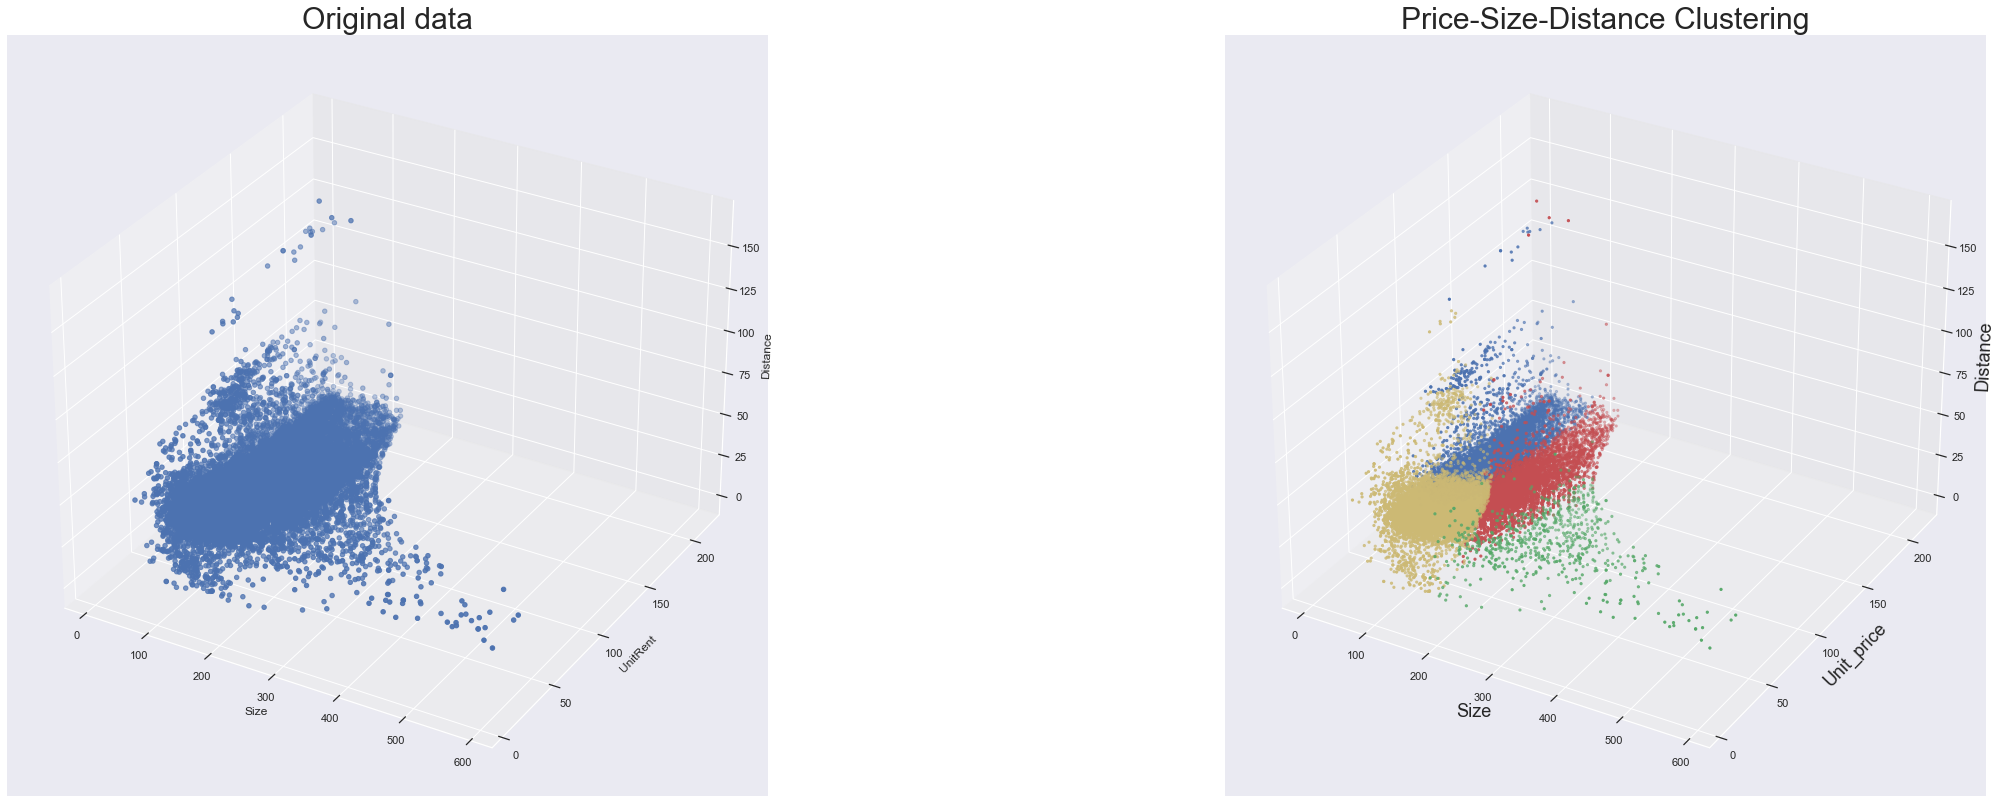

In [49]:
# Fig 6.Original vs Clustering
fig = plt.figure(figsize = (40,14))
ax1 = fig.add_subplot(121,projection='3d')
ax1.scatter(df_cluster['Size'], df_cluster['Unit_price'],df_cluster['Distance'],marker='o')
ax1.set_xlabel('Size', fontsize=12)
ax1.set_ylabel('UnitRent', fontsize=12)
ax1.set_zlabel('Distance', fontsize=12)
ax1.set_title('Original data', fontsize=30)

ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(df_cluster.loc[df_cluster.clusters==1]['Size'], df_cluster.loc[df_cluster.clusters==1]['Unit_price'],
            df_cluster.loc[df_cluster.clusters==1]['Distance'],label='1',marker='o',color='b',s=5)
ax2.scatter(df_cluster.loc[df_cluster.clusters==2]['Size'], df_cluster.loc[df_cluster.clusters==2]['Unit_price'],
            df_cluster.loc[df_cluster.clusters==2]['Distance'],label='2',marker='o',color='r',s=5)
ax2.scatter(df_cluster.loc[df_cluster.clusters==3]['Size'], df_cluster.loc[df_cluster.clusters==3]['Unit_price'],
            df_cluster.loc[df_cluster.clusters==3]['Distance'],label='3',marker='o',color='y',s=5)
ax2.scatter(df_cluster.loc[df_cluster.clusters==4]['Size'], df_cluster.loc[df_cluster.clusters==4]['Unit_price'],
            df_cluster.loc[df_cluster.clusters==4]['Distance'],label='4',marker='o',color='g',s=5)
ax2.scatter(df_cluster.loc[df_cluster.clusters==5]['Size'], df_cluster.loc[df_cluster.clusters==5]['Unit_price'],
            df_cluster.loc[df_cluster.clusters==5]['Distance'],label='5',marker='o',color='c',s=5)
#ax2.legend()
ax2.set_xlabel('Size', fontsize=18)
ax2.set_ylabel('Unit_price', fontsize=18)
ax2.set_zlabel('Distance', fontsize=18)
ax2.set_title('Price-Size-Distance Clustering', fontsize=30)

plt.savefig('./Fig 6.Original vs Clustering.jpg')
plt.show()

5.2 Make two variables clustering

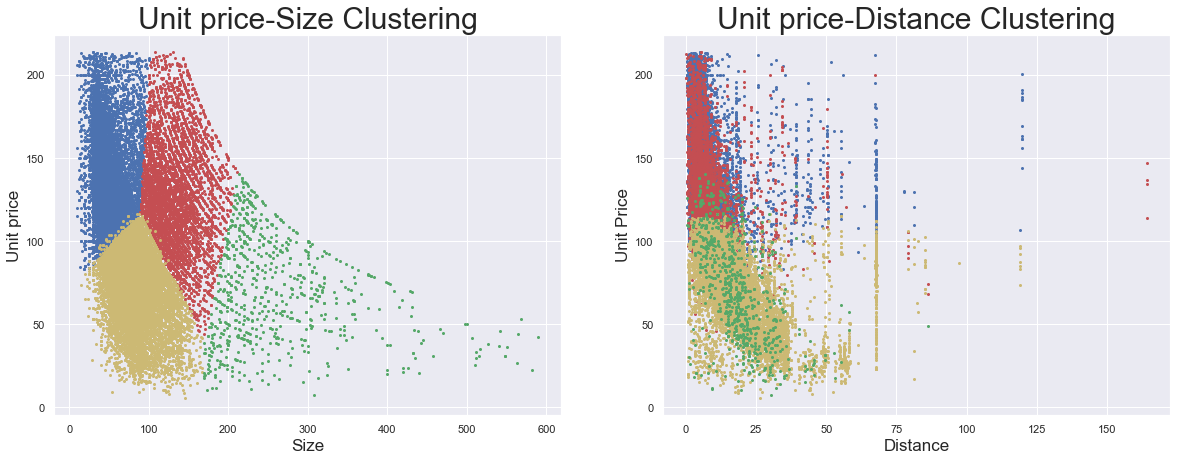

In [50]:
# Fig 7.Two variables Clustering
fig = plt.figure(figsize = (20,7))
ax1 = fig.add_subplot(121)
ax1.scatter(df_cluster.loc[df_cluster.clusters==1]['Size'],df_cluster.loc[df_cluster.clusters==1]['Unit_price'],s=4,
            label='1',marker='o',color='b')
ax1.scatter(df_cluster.loc[df_cluster.clusters==2]['Size'],df_cluster.loc[df_cluster.clusters==2]['Unit_price'],s=4,
            label='2',marker='o',color='r')
ax1.scatter(df_cluster.loc[df_cluster.clusters==3]['Size'],df_cluster.loc[df_cluster.clusters==3]['Unit_price'],s=4,
            label='3',marker='o',color='y')
ax1.scatter(df_cluster.loc[df_cluster.clusters==4]['Size'],df_cluster.loc[df_cluster.clusters==4]['Unit_price'],s=4,
            label='4',marker='o',color='g')
ax1.scatter(df_cluster.loc[df_cluster.clusters==5]['Size'],df_cluster.loc[df_cluster.clusters==5]['Unit_price'],s=4,
            label='5',marker='o',color='c')
#ax1.legend()
ax1.set_ylabel('Unit price', fontsize=17)
ax1.set_xlabel('Size', fontsize=17)
ax1.set_title('Unit price-Size Clustering', fontsize=30)

ax2 = fig.add_subplot(122)

ax2.scatter(df_cluster.loc[df_cluster.clusters==1]['Distance'],df_cluster.loc[df_cluster.clusters==1]['Unit_price'],s=4,
            label='1',marker='o',color='b')
ax2.scatter(df_cluster.loc[df_cluster.clusters==2]['Distance'],df_cluster.loc[df_cluster.clusters==2]['Unit_price'],s=4,
            label='2',marker='o',color='r')
ax2.scatter(df_cluster.loc[df_cluster.clusters==3]['Distance'],df_cluster.loc[df_cluster.clusters==3]['Unit_price'],s=4,
            label='3',marker='o',color='y')
ax2.scatter(df_cluster.loc[df_cluster.clusters==4]['Distance'],df_cluster.loc[df_cluster.clusters==4]['Unit_price'],s=4,
            label='4',marker='o',color='g')
ax2.scatter(df_cluster.loc[df_cluster.clusters==5]['Distance'],df_cluster.loc[df_cluster.clusters==5]['Unit_price'],s=4,
            label='5',marker='o',color='c')
#ax2.legend()
ax2.set_ylabel('Unit Price', fontsize=17)
ax2.set_xlabel('Distance', fontsize=17)
ax2.set_title('Unit price-Distance Clustering', fontsize=30)

plt.savefig('./Fig 7.Two variables Clustering.jpg')
plt.show()